In [1]:
import pyramid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/assiene/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [2]:
clustered_data = pd.read_csv("clustered_data/cluster_1.csv")
clustered_data.sort_values(["Year", "Month", "Day"], inplace=True)

In [3]:
clustered_data

,Unnamed: 0,StationIndex,Station,Year,Month,Day,Rainfall
0,0,1,Dhaka,1999,1,1,0
6696,0,1,Dhaka,1999,1,1,0
13392,372,2,Tangail,1999,1,1,0
20088,744,3,Mymensingh,1999,1,1,0
26784,1116,4,Faridpur,1999,1,1,0
33480,1488,5,Madaripur,1999,1,1,0
40176,1860,6,Srimangal,1999,1,1,0
46872,3348,10,Ishurdi,1999,1,1,0
53568,3720,11,Rajshahi,1999,1,1,0
60264,4836,14,chuadanga,1999,1,1,0


In [4]:
clustered_data.reset_index(inplace=True)
clustered_data["Date"] = clustered_data["Day"].map(str) + "/" + clustered_data["Month"].map(str) + "/" + clustered_data["Year"].map(str)
clustered_data.index = pd.to_datetime(clustered_data["Date"], format="%d/%m/%Y", errors="ignore")
clustered_data

,index,Unnamed: 0,StationIndex,Station,Year,Month,Day,Rainfall,Date
Date,,,,,,,,,
1/1/1999,0,0,1,Dhaka,1999,1,1,0,1/1/1999
1/1/1999,6696,0,1,Dhaka,1999,1,1,0,1/1/1999
1/1/1999,13392,372,2,Tangail,1999,1,1,0,1/1/1999
1/1/1999,20088,744,3,Mymensingh,1999,1,1,0,1/1/1999
1/1/1999,26784,1116,4,Faridpur,1999,1,1,0,1/1/1999
1/1/1999,33480,1488,5,Madaripur,1999,1,1,0,1/1/1999
1/1/1999,40176,1860,6,Srimangal,1999,1,1,0,1/1/1999
1/1/1999,46872,3348,10,Ishurdi,1999,1,1,0,1/1/1999
1/1/1999,53568,3720,11,Rajshahi,1999,1,1,0,1/1/1999


In [5]:
time_series_df = clustered_data[["Rainfall"]]
time_series_df

,Rainfall
Date,
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0


In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
time_series_df = clustered_data[clustered_data["Year"] >= 2014]
time_series_df = time_series_df[["Rainfall"]]
time_series_df

,Rainfall
Date,
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0


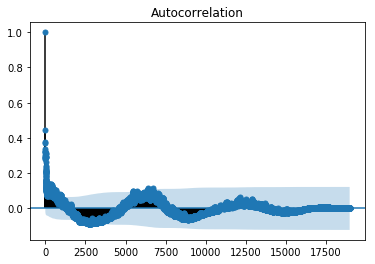

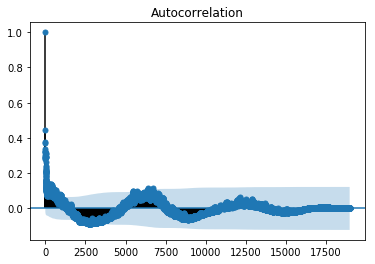

In [8]:
plot_acf(time_series_df.values)

KeyboardInterrupt: 

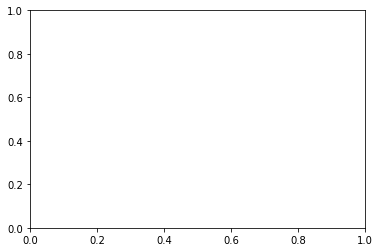

In [9]:
plot_pacf(time_series_df.values)